In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank_notes = pd.read_csv("Banknote-authentication-dataset-.csv")

In [3]:
bank_notes.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


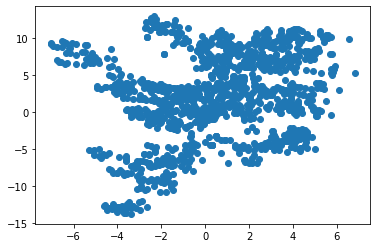

In [4]:
plt.scatter(bank_notes["V1"], bank_notes["V2"])

In [5]:
mean_notes = np.mean(bank_notes)
mean_notes

V1    0.433735
V2    1.922353
dtype: float64

In [6]:
std_notes = np.std(bank_notes)
std_notes

V1    2.841726
V2    5.866907
dtype: float64

Text(0, 0.5, 'V2 - Axis')

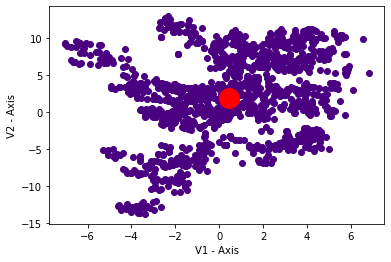

In [7]:
plt.scatter(bank_notes["V1"], bank_notes["V2"], c ="indigo")
plt.scatter(mean_notes[0], mean_notes[1], s = 400, c = "red")
plt.xlabel("V1 - Axis")
plt.ylabel("V2 - Axis")

Text(0, 0.5, 'V2 - Axis')

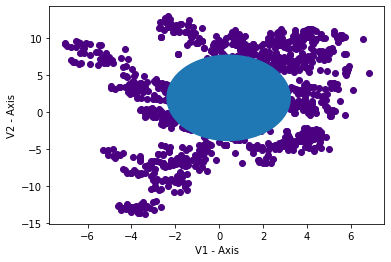

In [15]:
# Plotting an overlay
import matplotlib.patches as patches
note_ellipse = patches.Ellipse([mean_notes[0], mean_notes[1]], std_notes[0]*2, std_notes[1]*2)

fig, ax = plt.subplots(figsize = (6,4))

ax.scatter(bank_notes["V1"], bank_notes["V2"], c ="indigo")
ax.scatter(mean_notes[0], mean_notes[1], s = 400, c = "red", alpha = 0.000001)
ax.add_patch(note_ellipse, )

plt.xlabel("V1 - Axis")
plt.ylabel("V2 - Axis")

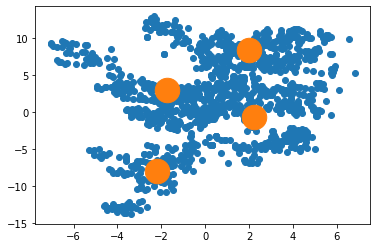

In [74]:
# Importing Sklearn library
from sklearn.cluster import KMeans
notes_stack = np.column_stack((bank_notes["V1"], bank_notes["V2"]))
km_result = KMeans(n_clusters=4).fit(notes_stack)

# Finding the centroids
clusters = km_result.cluster_centers_

# Plotting the data
plt.scatter(bank_notes["V1"], bank_notes["V2"], )
plt.scatter(clusters[:,0], clusters[:,1], s = 600)

In [76]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km_result = KMeans(n_clusters=k)
    km_result.fit(bank_notes[["V1", "V2"]])
    sse.append(km_result.inertia_)

In [72]:
sse

[58304.52906491891,
 26937.997863122684,
 16618.399429591693,
 12797.940678347257,
 9954.51947425261,
 7620.31506395541,
 6566.399626189125,
 5741.203016160508,
 4902.597267579815]

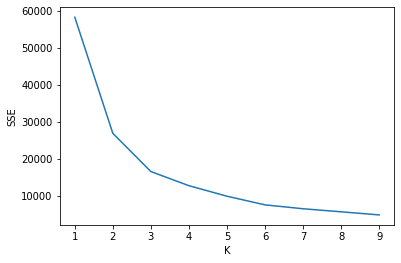

In [73]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng,sse)